<a href="https://colab.research.google.com/github/Saili-Myana/Covid19-data/blob/master/Xray_act1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2

In [0]:

import numpy as np
from tqdm import tqdm

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import os

In [0]:
import random

In [0]:

import gc

In [86]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [87]:
train_covid= '/content/gdrive/"My Drive"/"Covid project"/train_5-5-20-2-45pm/covid'
a= !ls {train_covid}
len(a)

208

In [0]:
train_dir='/content/gdrive/My Drive/Covid project/train_5-5-20-2-45pm'
test_dir='/content/gdrive/My Drive/Covid project/test_5-5-20-2-45pm'
#train_apple=['C:/Users/Saili/Desktop/hale_1\{}'.format(i) for i in os.listdir(train_dir) if 'apple' in i]
train_covid=os.path.join(train_dir,'covid')
test_covid=os.path.join(test_dir,'covid')
#print(tqdm(os.listdir(train_apple)))
#train_orange=['C:/Users/Saili/Desktop/hale_1\{}'.format(i) for i in os.listdir(train_dir) if 'orange' in i]
train_normal=os.path.join(train_dir,'normal')
test_normal=os.path.join(test_dir,'normal')

In [89]:
len(os.listdir(train_covid))


624

In [90]:
train_imgs=[]
labels=['covid','normal']
a=0
for l in labels:
  new_path=os.path.join(train_dir,l)
  num_label=labels.index(l)
  list=os.listdir(new_path)
  for img in list:
    img=cv2.imread(os.path.join(new_path,img),cv2.IMREAD_COLOR)
    img=cv2.resize(img,(300,300),interpolation = cv2.INTER_CUBIC)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_imgs.append([img,num_label])
    print('runnungggg')
    a+=1
    print(a)
    #imgplot=plt.imshow(RGB_img)
    
    #plt.show()


runnungggg
1
runnungggg
2
runnungggg
3
runnungggg
4
runnungggg
5
runnungggg
6
runnungggg
7
runnungggg
8
runnungggg
9
runnungggg
10
runnungggg
11
runnungggg
12
runnungggg
13
runnungggg
14
runnungggg
15
runnungggg
16
runnungggg
17
runnungggg
18
runnungggg
19
runnungggg
20
runnungggg
21
runnungggg
22
runnungggg
23
runnungggg
24
runnungggg
25
runnungggg
26
runnungggg
27
runnungggg
28
runnungggg
29
runnungggg
30
runnungggg
31
runnungggg
32
runnungggg
33
runnungggg
34
runnungggg
35
runnungggg
36
runnungggg
37
runnungggg
38
runnungggg
39
runnungggg
40
runnungggg
41
runnungggg
42
runnungggg
43
runnungggg
44
runnungggg
45
runnungggg
46
runnungggg
47
runnungggg
48
runnungggg
49
runnungggg
50
runnungggg
51
runnungggg
52
runnungggg
53
runnungggg
54
runnungggg
55
runnungggg
56
runnungggg
57
runnungggg
58
runnungggg
59
runnungggg
60
runnungggg
61
runnungggg
62
runnungggg
63
runnungggg
64
runnungggg
65
runnungggg
66
runnungggg
67
runnungggg
68
runnungggg
69
runnungggg
70
runnungggg
71
runnungggg
72
r

In [0]:
random.shuffle(train_imgs)

In [92]:
np.array(train_imgs).shape

(1248, 2)

In [0]:
train_imgs=np.array(train_imgs)
y=train_imgs[:,1]
X=train_imgs[:,0]

In [94]:
X.shape

(1248,)

0
1
0
0
1


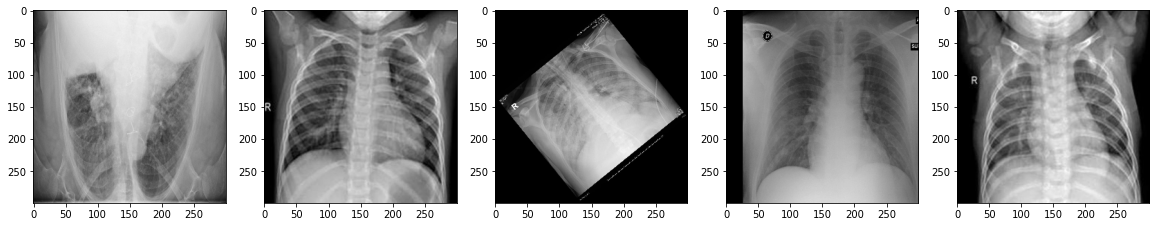

In [95]:
plt.figure(figsize=(20,10))
columns=5
for i in range(columns):
    plt.subplot(5/columns +1,columns,i+1)
    RGB_img = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    imgplot=plt.imshow(RGB_img)
    #plt.imshow(X[i])
    print(y[i])

In [96]:
del train_imgs
gc.collect()

25052

Text(0.5, 1.0, 'Covid and normal')

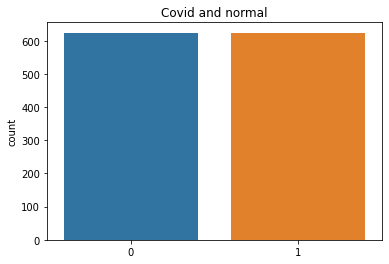

In [97]:
import seaborn as sns
X=np.array(X)
y=np.array(y)
sns.countplot(y)
plt.title('Covid and normal')

In [98]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(1248,)
(1248,)


In [99]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=2)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(998,)
(250,)
(998,)
(250,)


In [100]:
del X
del y
gc.collect()

0

In [0]:
ntrain=len(X_train)
nval=len(X_val)
batch_size=32 #4,8,16,32

In [0]:
X_train1=[]
X_val1=[]
y_train1=[]
y_val1=[]
for i in range(len(X_train)):
  X_train1.append(X_train[i])
for i in range(len(X_val)):
  X_val1.append(X_val[i])
for i in range(len(y_train)):
  y_train1.append(y_train[i])
for i in range(len(y_val)):
  y_val1.append(y_val[i])

In [103]:
np.array(X_val1).shape

(250, 300, 300, 3)

In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

In [0]:
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects


def custom_activation(x):
    return (K.log(x+(1+x**2)**0.5))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [28]:
'''
# Creating a model
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# Custom activation function
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects


def custom_activation(x):
    return (K.log(x+(1+x**2)**0.5))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

# Usage
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation(custom_activation, name='SpecialActivation'))
print(model.summary())'''

"\n# Creating a model\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nimport numpy as np\n# Custom activation function\nfrom keras.layers import Activation\nfrom keras import backend as K\nfrom keras.utils.generic_utils import get_custom_objects\n\n\ndef custom_activation(x):\n    return (K.log(x+(1+x**2)**0.5))\n\nget_custom_objects().update({'custom_activation': Activation(custom_activation)})\n\n# Usage\nmodel = Sequential()\nmodel.add(Dense(32, input_dim=784))\nmodel.add(Activation(custom_activation, name='SpecialActivation'))\nprint(model.summary())"

In [115]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation=Activation(custom_activation, name='SpecialActivation'),input_shape=(300,300,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation=Activation(custom_activation, name='SpecialActivation')))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation=Activation(custom_activation, name='SpecialActivation')))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation=Activation(custom_activation, name='SpecialActivation')))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation=Activation(custom_activation, name='SpecialActivation')))
model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [116]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 33, 128)      

In [0]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [105]:
'''
train_datagen= ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,)
                
val_datagen=ImageDataGenerator(rescale=1./255)'''

'\ntrain_datagen= ImageDataGenerator(rescale=1./255,\n                                 rotation_range=40,\n                                 width_shift_range=0.2,\n                                 height_shift_range=0.2,\n                                 shear_range=0.2,\n                                 zoom_range=0.2,\n                                 horizontal_flip=True,)\n                \nval_datagen=ImageDataGenerator(rescale=1./255)'

In [0]:
train_datagen=ImageDataGenerator()

val_datagen=ImageDataGenerator()

In [106]:
X_train1=np.array(X_train1)
y_train1=np.array(y_train1)
X_val1=np.array(X_val1)
y_val1=np.array(y_val1)
print(X_train1.shape)
print(y_train1.shape)
print(X_val1.shape)
print(y_val1.shape)

(998, 300, 300, 3)
(998,)
(250, 300, 300, 3)
(250,)


In [0]:
train_generator=train_datagen.flow(X_train1,y_train1,batch_size=batch_size)
val_generator=val_datagen.flow(X_val1,y_val1,batch_size=batch_size)

In [120]:
history=model.fit(train_generator,
                 steps_per_epoch=ntrain // batch_size,
                 epochs=64,
                 validation_data=val_generator,
                 validation_steps=nval // batch_size)

Epoch 1/64
31/31 [==============================] - 12s 399ms/step - loss: 3.3818 - acc: 0.7536 - val_loss: 0.2119 - val_acc: 0.9643
Epoch 2/64
31/31 [==============================] - 12s 372ms/step - loss: 1.4416 - acc: 0.8975 - val_loss: 0.1849 - val_acc: 0.9450
Epoch 3/64
31/31 [==============================] - 12s 372ms/step - loss: 0.7056 - acc: 0.8758 - val_loss: 0.1649 - val_acc: 0.9495
Epoch 4/64
31/31 [==============================] - 12s 373ms/step - loss: 0.0624 - acc: 0.9803 - val_loss: 0.0091 - val_acc: 0.9817
Epoch 5/64
31/31 [==============================] - 12s 373ms/step - loss: 0.7194 - acc: 0.9141 - val_loss: 0.1829 - val_acc: 0.9817
Epoch 6/64
31/31 [==============================] - 12s 371ms/step - loss: 0.1547 - acc: 0.9752 - val_loss: 0.0506 - val_acc: 0.9817
Epoch 7/64
31/31 [==============================] - 12s 372ms/step - loss: 0.3352 - acc: 0.9493 - val_loss: 0.0828 - val_acc: 0.9725
Epoch 8/64
31/31 [==============================] - 11s 370ms/step - 

In [121]:
'''model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')'''

"model.save_weights('model_wieghts.h5')\nmodel.save('model_keras.h5')"

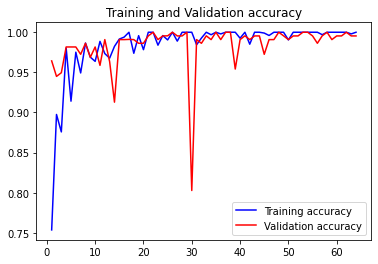

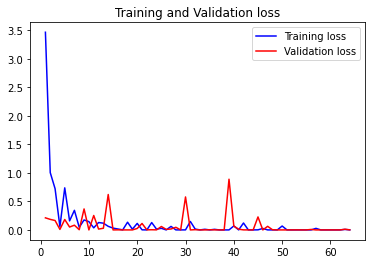

In [122]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [107]:
test_imgs=[]
labels=['covid','normal']
i=0
for l in labels:
  new_path=os.path.join(test_dir,l)
  num_label=labels.index(l)
  for img in os.listdir(new_path):
    img=cv2.imread(os.path.join(new_path,img),cv2.IMREAD_COLOR)
    img=cv2.resize(img,(300,300),interpolation = cv2.INTER_CUBIC)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_imgs.append([img,num_label])
    #imgplot=plt.imshow(RGB_img)
    i+=1
    print(i)
    #plt.show()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [108]:
np.array(test_imgs).shape

(576, 2)

In [0]:
random.shuffle(test_imgs)

In [0]:
test_imgs=np.array(test_imgs)
y_test=test_imgs[:,1]
X_test=test_imgs[:,0]

In [0]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [0]:
X_test1=[]
for i in range(len(X_test)):
  X_test1.append(X_test[i])

In [113]:
X_test1=np.array(X_test1)
#y_test1=np.array(y_test1)
X_test1.shape

(576, 300, 300, 3)

In [0]:
#X_test,y_test = read_and_process_image(test_image)
#x=np.array(X_test)
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
pred=model.predict(X_test1)

In [125]:
len(pred)

576

In [126]:
len(y_test)

576

In [127]:
for i in range(len(y_test)):
    print(f'{pred[i]} {y_test[i]}')

[1.] 1
[1.0278932e-08] 0
[3.9176257e-06] 0
[6.8349466e-26] 0
[1.] 1
[1.9297159e-20] 0
[1.] 1
[1.] 1
[8.600492e-26] 0
[1.] 1
[1.1325423e-17] 0
[2.9011043e-20] 0
[1.] 1
[1.789032e-11] 0
[3.9731595e-24] 0
[1.] 1
[9.051028e-20] 0
[0.99996376] 1
[1.] 1
[6.5977466e-19] 0
[2.314371e-15] 0
[1.] 1
[9.378944e-17] 0
[1.] 1
[1.] 1
[1.00123685e-11] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[8.7930114e-16] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[4.721539e-24] 0
[1.9014476e-24] 0
[1.] 1
[0.866586] 1
[1.2595116e-23] 0
[1.] 1
[1.2880914e-24] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.2662304e-18] 0
[1.] 1
[1.] 1
[1.] 1
[4.0116339e-22] 0
[1.4265772e-15] 0
[1.5860742e-11] 0
[1.] 1
[0.9999769] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.2548632e-25] 0
[1.5183827e-20] 0
[1.] 1
[1.] 1
[1.9642287e-20] 0
[1.] 1
[1.] 1
[5.3228196e-18] 0
[6.550548e-12] 0
[1.] 1
[1.8709818e-18] 0
[1.2211046e-24] 0
[1.] 1
[7.423959e-20] 0
[1.5277294e-22] 0
[1.] 1
[0.9999999] 1
[3.719699e-26] 0
[1.5216867e-14] 0
[1.] 1
[1.] 1
[1.5520671e-06] 0
[2.9926347e-28] 0
[1.

In [0]:
#i=0
correct=0
wrong=0
n=0
for iter in range(len(y_test)):
    
  
    if pred[iter]>0.5:
        if y_test[iter]==1:
            correct+=1
        else:
            wrong+=1
    else:
        if y_test[iter]==0:
            correct+=1
        else:
            wrong+=1
        
  
    

In [129]:
print(correct)
print(wrong)

576
0


In [130]:
correct/(correct+wrong)

1.0

In [55]:
'''
test_dir='/content/gdrive/My Drive/Covid project/Test'
test_imgs=[]
i=0
labels=['covid','normal']
for l in labels:
  new_path=os.path.join(test_dir,l)
  num_label=labels.index(l)
  for img in os.listdir(new_path):
    img=cv2.imread(os.path.join(new_path,img),cv2.IMREAD_COLOR)
    img=cv2.resize(img,(300,300),interpolation = cv2.INTER_CUBIC)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_imgs.append([img,num_label])
    #imgplot=plt.imshow(RGB_img)
    i+=1
    print(i)
    #plt.show()
'''

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160


In [56]:
'''
test_imgs=np.array(test_imgs)
y_test=test_imgs[:,1]
X_test=test_imgs[:,0]

X_test=np.array(X_test)
y_test=np.array(y_test)

X_test1=[]
for i in range(len(X_test)):
  X_test1.append(X_test[i])

X_test1=np.array(X_test1)
#y_test1=np.array(y_test1)
X_test1.shape

pred=model.predict(X_test1)

for i in range(len(y_test)):
    print(f'{pred[i]} {y_test[i]}')
 '''

[1.7356574e-18] 0
[1.] 0
[1.5409083e-17] 0
[7.464085e-08] 0
[9.389499e-18] 0
[2.3812484e-25] 0
[3.2055315e-13] 0
[8.392609e-12] 0
[2.253992e-21] 0
[8.20851e-05] 0
[1.16511494e-07] 0
[2.5987452e-11] 0
[2.0137322e-14] 0
[0.9999995] 0
[1.241147e-11] 0
[5.4113796e-21] 0
[1.438673e-20] 0
[3.9335267e-13] 0
[6.045598e-10] 0
[1.2396978e-13] 0
[4.4989814e-11] 0
[1.02040034e-11] 0
[0.8940193] 0
[5.90017e-10] 0
[1.9161118e-17] 0
[5.416754e-19] 0
[1.3586867e-15] 0
[1.4018253e-17] 0
[1.9422403e-05] 0
[4.0367954e-14] 0
[0.06787956] 0
[3.6230248e-12] 0
[1.6806237e-15] 0
[3.436894e-14] 0
[8.175128e-06] 0
[1.197278e-10] 0
[4.3433586e-13] 0
[1.632699e-11] 0
[5.0187177e-11] 0
[8.419583e-18] 0
[4.223535e-10] 0
[8.3630803e-19] 0
[0.285876] 0
[1.7148078e-11] 0
[9.4041025e-06] 0
[3.4916202e-12] 0
[0.71762127] 0
[5.780168e-11] 0
[3.106481e-13] 0
[7.299629e-15] 0
[1.1789676e-10] 0
[5.347806e-09] 0
[4.870771e-22] 0
[1.2989786e-10] 0
[0.99999785] 0
[1.] 0
[0.97133315] 0
[2.5157034e-18] 0
[0.0041115] 0
[4.1709968

In [57]:
'''#i=0
correct=0
wrong=0
n=0
for iter in range(len(y_test)):
    
  
    if pred[iter]>0.5:
        if y_test[iter]==1:
            correct+=1
        else:
            wrong+=1
    else:
        if y_test[iter]==0:
            correct+=1
        else:
            wrong+=1
        
print(correct)
print(wrong)
print(correct/(correct+wrong))
  
'''

149
11
0.93125


In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [132]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

train_datagen=ImageDataGenerator()

val_datagen=ImageDataGenerator()

history=model.fit(train_generator,
                 steps_per_epoch=ntrain // batch_size,
                 epochs=64,
                 validation_data=val_generator,
                 validation_steps=nval // batch_size)

Epoch 1/64
31/31 [==============================] - 7s 232ms/step - loss: 9.9395 - acc: 0.7888 - val_loss: 0.2422 - val_acc: 0.9062
Epoch 2/64
31/31 [==============================] - 7s 214ms/step - loss: 0.9001 - acc: 0.9027 - val_loss: 0.1233 - val_acc: 0.9771
Epoch 3/64
31/31 [==============================] - 7s 214ms/step - loss: 0.1451 - acc: 0.9555 - val_loss: 1.9476 - val_acc: 0.5550
Epoch 4/64
31/31 [==============================] - 7s 218ms/step - loss: 0.3197 - acc: 0.9446 - val_loss: 0.0795 - val_acc: 0.9679
Epoch 5/64
31/31 [==============================] - 7s 211ms/step - loss: 0.3239 - acc: 0.9511 - val_loss: 0.1077 - val_acc: 0.9908
Epoch 6/64
31/31 [==============================] - 7s 214ms/step - loss: 0.0235 - acc: 0.9896 - val_loss: 0.1015 - val_acc: 0.9862
Epoch 7/64
31/31 [==============================] - 7s 214ms/step - loss: 0.1565 - acc: 0.9669 - val_loss: 0.2491 - val_acc: 0.9358
Epoch 8/64
31/31 [==============================] - 7s 212ms/step - loss: 0.

In [0]:
pred=model.predict(X_test1)

In [134]:
len(pred)

576

In [135]:
#i=0
correct=0
wrong=0
n=0
for iter in range(len(y_test)):
    
  
    if pred[iter]>0.5:
        if y_test[iter]==1:
            correct+=1
        else:
            wrong+=1
    else:
        if y_test[iter]==0:
            correct+=1
        else:
            wrong+=1
        
print(correct)
print(wrong)
print(correct/(correct+wrong))
  


572
4
0.9930555555555556


In [0]:
i=0
correct=0
wrong=0
n=0
for batch in test_datagen.flow(X_test1,batch_size=1):
    pred=model.predict(batch)
    try:
        if pred>0.5:
            if y_test[i]==1:
                correct+=1
            else:
                wrong+=1
        else:
            if y_test[i]==0:
                correct+=1
            else:
                wrong+=1
        n+=1
        i+=1
    except Exception:
        print(i)

576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576
576


KeyboardInterrupt: ignored

In [0]:
y_test.size

576

In [0]:
y[]

<function matplotlib.pyplot.show>

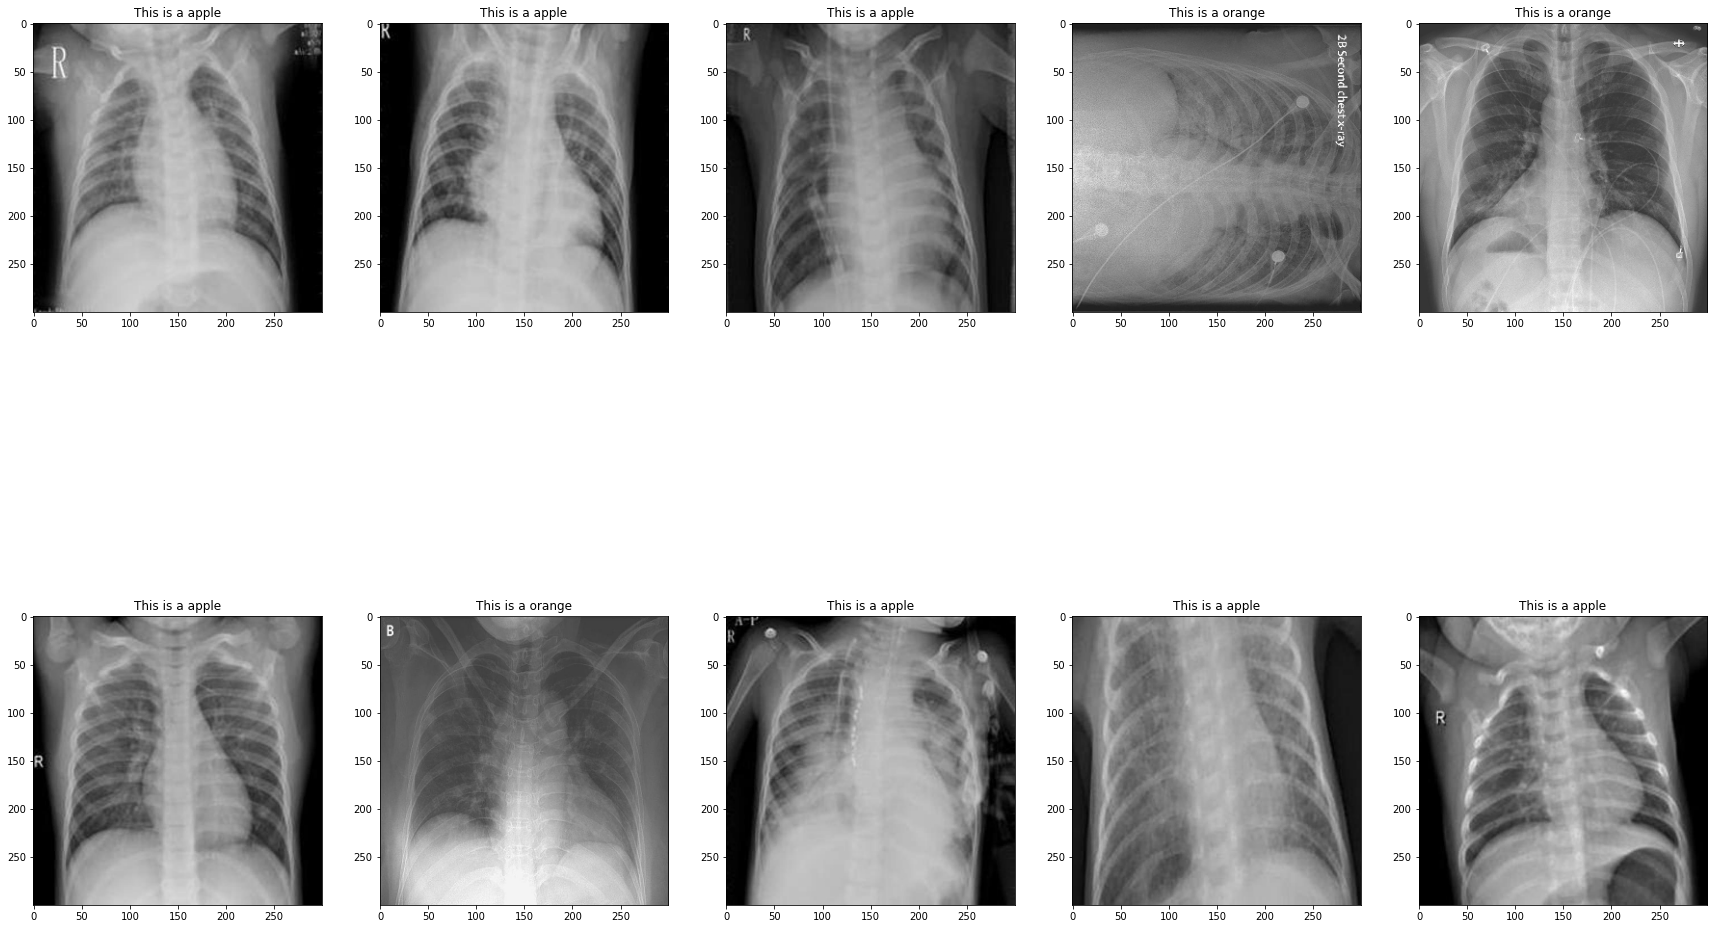

In [0]:
i=0
text_labels=[]
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(X_test1,batch_size=1):
    pred=model.predict(batch)
    if pred >0.5:
        text_labels.append('apple')
    else:
        text_labels.append('orange')
    plt.subplot(5/columns+1,columns,i+1)
    plt.title('This is a '+ text_labels[i])
    RGB_img = cv2.cvtColor(batch[0], cv2.COLOR_BGR2RGB)
    imgplot=plt.imshow(RGB_img)
    #imgplot=plt.imshow(batch[0])
    i += 1
    if i%10==0:
        break
plt.show